Veri okunacak: C:\Users\harun\OneDrive\Desktop\earthquake-data-analysis-project-main\earthquake-data-analysis-project-main\notebooks\..\data\processed\depremler_ve_faylar_birlestirilmis.csv
Veri yüklendi. 4459 adet deprem ile detaylı harita oluşturuluyor...


C:\Users\harun\AppData\Local\Temp\ipykernel_3948\3183679045.py:19: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



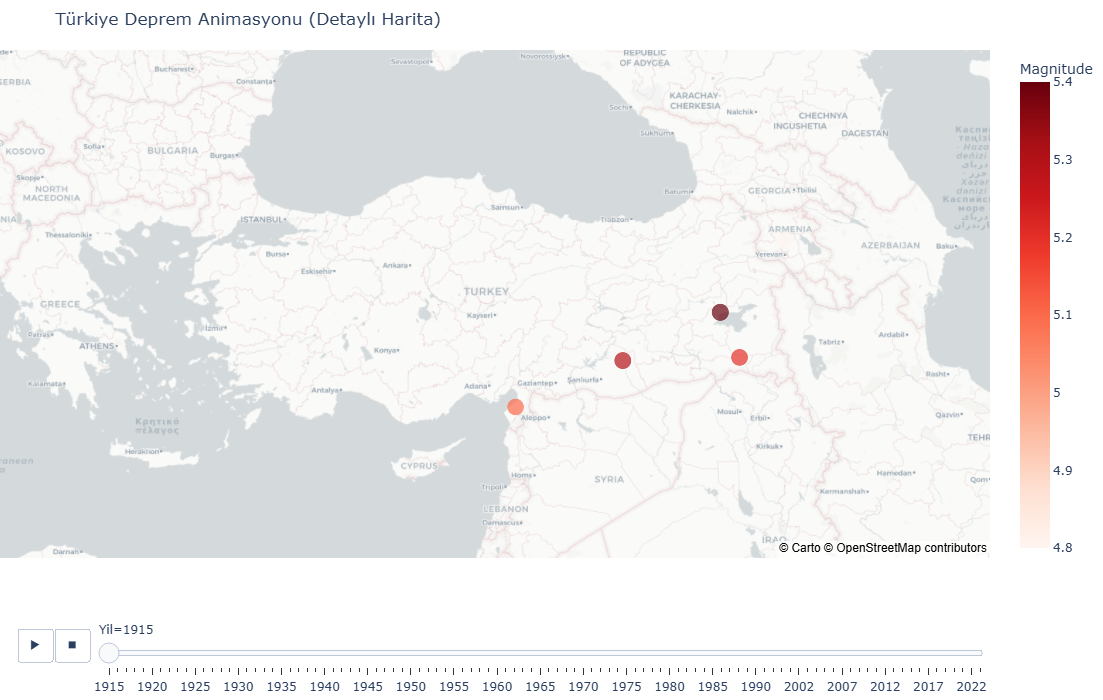

Detaylı harita başarıyla oluşturuldu: C:\Users\harun\OneDrive\Desktop\earthquake-data-analysis-project-main\earthquake-data-analysis-project-main\notebooks\..\outputs\maps\zaman_animasyonu_detayli.html


In [8]:
import pandas as pd
import plotly.express as px
import os

current_dir = os.getcwd()
input_path = os.path.join(current_dir, "..", "data", "processed", "depremler_ve_faylar_birlestirilmis.csv")
output_dir = os.path.join(current_dir, "..", "outputs","maps")
output_path = os.path.join(output_dir, "zaman_animasyonu_detayli.html")

print(f"Veri okunacak: {input_path}")

try:
    df = pd.read_csv(input_path, parse_dates=['Date'])
    df['Yil'] = df['Date'].dt.year
    filtreli_df = df[(df['Magnitude'] > 4.0) & (df['Yil'] >= 1915)].sort_values("Yil")
    
    print(f"Veri yüklendi. {len(filtreli_df)} adet deprem ile detaylı harita oluşturuluyor...")

    fig_anim = px.scatter_mapbox(
        filtreli_df,
        lat='Latitude',
        lon='Longitude',
        color='Magnitude',      
        size='Magnitude',       
        animation_frame='Yil',  
        title="Türkiye Deprem Animasyonu (Detaylı Harita)",
        color_continuous_scale='Reds', 
        size_max=15,
        zoom=4.5,
        center=dict(lat=39.0, lon=35.5),
        mapbox_style="carto-positron" 
    )

    fig_anim.update_layout(
        height=700,
        margin={"r":0,"t":50,"l":0,"b":0},
    )

    os.makedirs(output_dir, exist_ok=True)
    fig_anim.write_html(output_path)
    fig_anim.show()

    print(f"Detaylı harita başarıyla oluşturuldu: {output_path}")

except FileNotFoundError:
    print(f"HATA: Dosya bulunamadı!\nAranan yol: {input_path}")
except Exception as e:
    print(f"Beklenmeyen bir hata oluştu: {e}")